In [74]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_data):
    n_data = num_data
    radius = 2.0
    n_half_data = n_data//2
    data1 = np.random.randn(n_half_data, 2) * 0.1
    rand_theta = np.random.rand(n_half_data) * 2.0 * np.pi
    data1[:, 0] += np.cos(rand_theta) * 0.3
    data1[:, 1] += np.sin(rand_theta) * 0.3
    label1 = np.ones(n_half_data, np.int)

    data2 = np.random.randn(n_half_data, 2) * 0.1
    rand_theta = np.random.rand(n_half_data) * 2.0 * np.pi
    data2[:, 0] += np.cos(rand_theta) * 1.0
    data2[:, 1] += np.sin(rand_theta) * 1.0
    label2 = np.zeros(n_half_data, np.int)
    data = np.concatenate([data1, data2])
    label = np.concatenate([label1, label2])
    return data, label

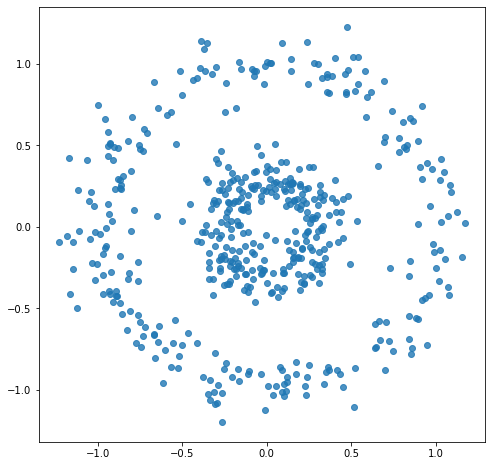

In [75]:
data, label = generate_data(512)
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.8)    
plt.show()

In [76]:
def distance(data):
    dist = np.zeros(shape=(data.shape[0], data.shape[0]), dtype=np.float)
    for i in range(data.shape[0]):
        for j in range(i+1, data.shape[0]):
            v_ij = data[i] - data[j]
            dist[i][j] = (v_ij * v_ij).sum()
            dist[j][i] = dist[i][j]
    return dist

def get_small_evs(L, K):
    S, V = np.linalg.eig(L)
    cols_idx = np.argsort(S)[0:K]
    return V[:, cols_idx]

In [77]:
def metric(a, b):
    return ((a - b)**2).mean()

def clustering(cen ,data):
    total_cost = 0.0
    label = np.zeros(data.shape[0], dtype=np.int)
    for i in range(data.shape[0]):
        min_cost = metric(cen[0], data[i])
        cls = 0
        for k in range(1, cen.shape[0]):
            cost = metric(cen[k], data[i])
            if cost < min_cost:
                min_cost = cost
                cls = k
        label[i] = cls
        total_cost = min_cost
    return total_cost, label


def get_centroid(K, data, label):
    cen = np.zeros(shape=(K, *data.shape[1:]), dtype=np.float)
    count = np.zeros(shape=(K), dtype=np.int)
    for i in range(data.shape[0]):
        cen[label[i]] += data[i]
        count[label[i]] += 1
    for k in range(K):
        if count[k] == 0:
            cen[k] = np.random.randn(*cen.shape[1:]) * 0.1  + cen.mean(axis=0)
        else:
            cen[k] = cen[k] / count[k]
    return cen

def k_means(data, initial_cen):
    K = initial_cen.shape[0]
    cen = initial_cen
    old_cen = cen
    cost = 0.
    for ep in range(100):
        cost, label = clustering(cen, data)
        cen = get_centroid(K, data, label)
        if (cen == old_cen).all():
            break
        old_cen = cen
    return cost, cen

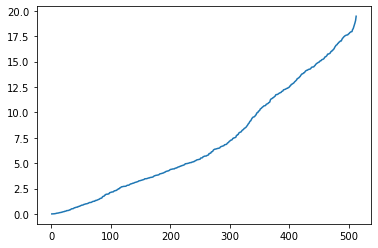

In [92]:
K = 2
dist = distance(data)
W = np.exp(-dist/0.01) # gaussian kernel with variance = 0.005


W = W - np.eye(data.shape[0])
D = np.diag(W.sum(axis=0))

L = (D - W)
S, V = np.linalg.eig(L)
evalues = S[np.argsort(S)]
plt.plot(np.arange(1, 1 + len(S)), evalues)
plt.show()
evs = get_small_evs(L,K)

In [93]:
initial = np.random.randn(K, evs.shape[1])*0.1 + evs.mean(axis=0)
cost, centroid = k_means(evs, initial)
_, label = clustering(centroid, evs)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

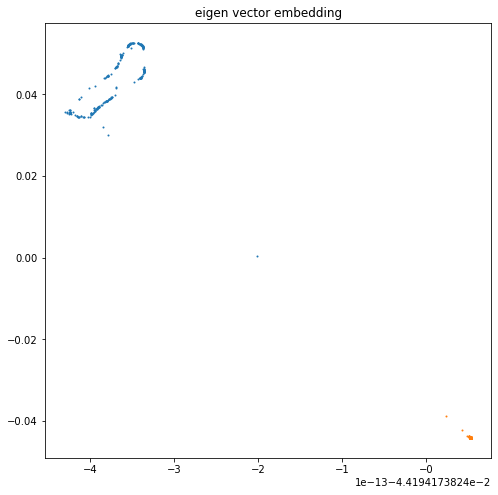

In [96]:
plt.figure(figsize=(8, 8))
plt.title('eigen vector embedding')
for k in range(K):
    cluster = evs[label == k]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=1)
# plt.scatter(centroid[0][0], centroid[0][1])
# plt.scatter(centroid[1][0], centroid[1][1])
plt.show()

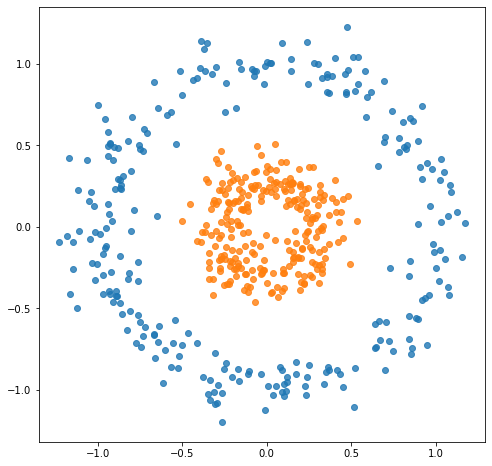

In [97]:
plt.figure(figsize=(8, 8))
for k in range(K):
    cluster = data[label == k]
    plt.scatter(cluster[:, 0], cluster[:, 1], alpha=0.8)
plt.show()